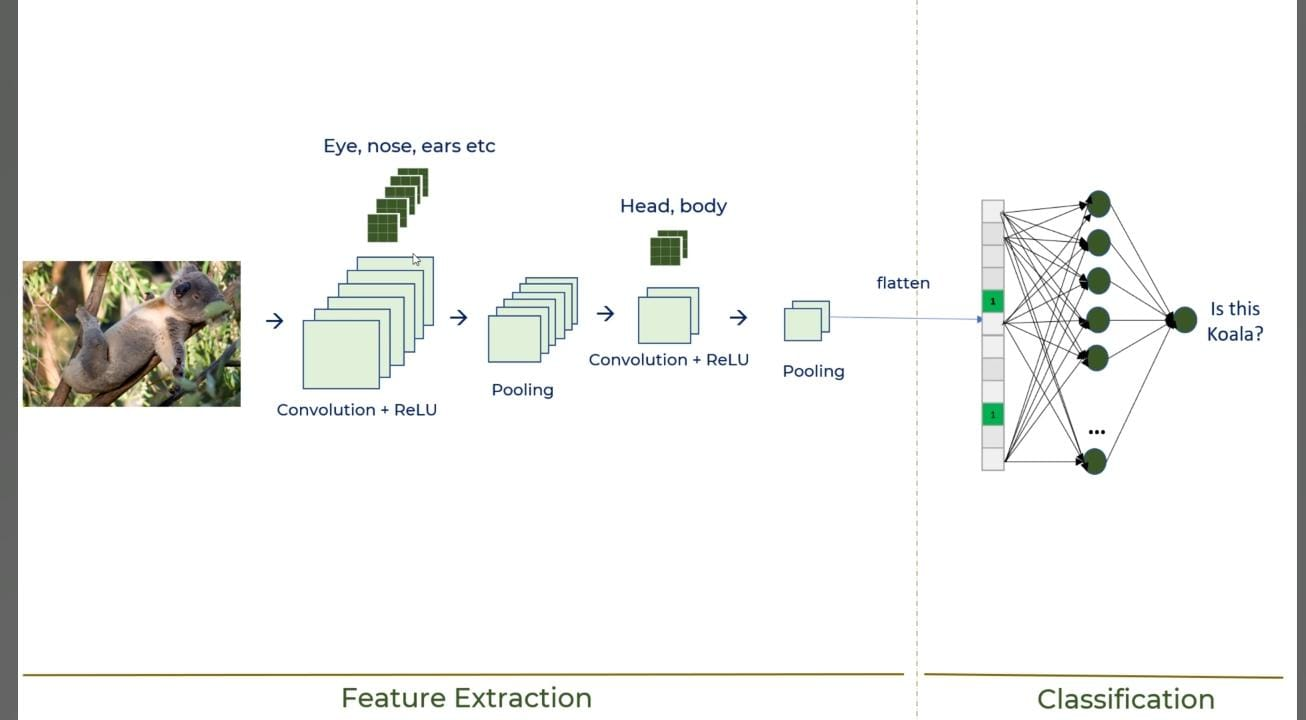

In [1]:
!pip install opencv-python


In [2]:
!pip install opencv-contrib-python


  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# reading images

In [4]:
img=cv.imread(r"C:\Users\prach\Desktop\Python\cnn dl\cats.jpg")
cv.imshow("cats",img)

cv.waitKey(6)


-1

In [ ]:
img = cv.imread(r"C:\Users\prach\Desktop\Python\cnn dl\cats.jpg")
if img is None:
    raise ValueError("Error loading image")
    
cv.imshow("cats", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:


try:
    img = cv.imread(r"C:\Users\prach\Desktop\Python\cnn dl\cats.jpg")
    if img is None:
        raise ValueError("Error loading image")
    
    cv.imshow("cats", img)
    cv.waitKey(0)
    cv.destroyAllWindows()

except Exception as e:
    print("An error occurred:", e)


# reading videos

In [ ]:
vid=cv.VideoCapture(r"C:\Users\prach\Desktop\Python\cnn dl\Two Little Hands To Clap Clap Clap Rhyme With Lyrics I English Kids Songs _ Learning Videos For Kids.mp4")
while True:
    isTrue,frame=vid.read()
    
    if not isTrue:
        raise ValueError("Error loading image")
        break
    cv.imshow("video",frame)
    
    if cv.waitKey(20) & 0xFF==ord("d"):
        break
vid.release()
cv.destroyAllWindows()
#cv.waitKey(60)


In [ ]:
isTrue

In [ ]:
frame


The value -1 is being returned because the waitKey() function is timing out without receiving any keyboard input.

In OpenCV, when waitKey() is called with a delay value greater than zero (e.g., cv.waitKey(20)), it waits for the specified number of milliseconds for a keyboard event. If no event occurs within that time, it returns -1.

# Image processing

Popular python frameworks
- simplcv
- keras
- Tensorflow
- Numpy
- PyTorch
- OpenCV
- simpleitk

#### Image filtering

process of modifying an image by changing its shades or color of the pixcel.also used to increase brightness and contrast

#### Padding

relevent to convolutional neural networks as it refers to the amount of pixels added to an image when its being processed by the kernel or filter
adding extra layers of picture
reduce loss of info

#### thresolding : image segmentation

converted everything to black and white based on the threshold value

In [ ]:
pip install --upgrade tensorflow

In [ ]:
from keras.datasets import mnist

In [ ]:
mnist.load_data()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_test[0][0][0]

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
X_train

In [ ]:
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

In [ ]:
plt.imshow(X_train[300])
plt.title(y_train[300])
plt.show()

In [ ]:
plt.imshow(X_train[59000])
plt.title(y_train[59000])
plt.show()

In [ ]:
plt.imshow(X_train[300],cmap="gray")
plt.title(y_train[300])
plt.show()

# creating model

In [ ]:
from keras.layers import Dense,Conv2D, AveragePooling2D,Flatten

from keras.models import Sequential


In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=4,kernel_size=(5,5),activation="relu", input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

filters=4: This specifies the number of filters (also known as kernels or channels) in the Conv2D layer. In this case, there are 4 filters.
kernel_size=(5,5): This specifies the size of the convolutional kernel. In this case, each kernel is a 5x5 matrix.
activation="relu": This specifies the activation function applied to the output of the convolutional layer. "relu" stands for Rectified Linear Unit, which is a commonly used activation function in deep learning models.
input_shape=(28,28,1): This specifies the shape of the input data that the model expects. In this case, the input data is expected to be 28x28 pixels with 1 channel (for grayscale images). If you're working with color images (RGB), the input shape would be (28, 28, 3).
pool_size=(2,2): This specifies the size of the pooling window. In this case, it's a 2x2 window. Average pooling calculates the average value of each 2x2 window in the input feature map and outputs the result. It helps reduce the spatial dimensions of the feature maps while retaining the most important information.

In [ ]:
model.add(Conv2D(filters=4,kernel_size=(7,7),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=10,activation="softmax"))

 The Flatten layer is used to convert the multi-dimensional output of the previous layer into a one-dimensional array
 
 units=10: This specifies the number of neurons (or units) in the Dense layer. In this case, there are 10 units, which typically corresponds to the number of classes in the classification task.
activation="softmax": This specifies the activation function applied to the output of the Dense layer. "softmax" is a commonly used activation function for multi-class classification tasks. It normalizes the output into a probability distribution over the classes, making it suitable for classification tasks.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,epochs=1,batch_size=1)

In [ ]:
plt.imshow(X_test[0])

In [ ]:
X_test[0].shape

In [ ]:
X_test[0]

In [ ]:
test1=X_test[0].reshape(-1,28,28,1)

In [ ]:
test1

In [ ]:
test1.shape

In [ ]:
predictions=model.predict(test1)

In [ ]:
predictions

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

In [ ]:
plt.imshow(X_test[78])

In [ ]:
test2=X_test[78].reshape(-1,28,28,1)

In [ ]:
test2

In [ ]:
predictions=model.predict(test2)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

In [ ]:
l=[9]

np.array(l)

In [ ]:
X_test=X_test.reshape(-1,28,28,1)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

In [ ]:
y_test#actual data

In [ ]:
predicted_classes[78]

In [ ]:
y_test[78]

In [ ]:
predicted_classes[78]

In [ ]:
y_test[78]

In [ ]:
accuracy = accuracy_score(y_test, predicted_classes)
accuracy